# Experiment 1: Baselines

WANDB tag: `exp1`

In [1]:
import matplotlib.pyplot as plt
import wandb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('paper')

In [2]:
api = wandb.Api(api_key="cc080145b244f97b7db093ba0e3de5088e7ee7aa")

In [3]:
runs = api.runs(path="acs-thesis-lb2027/gnn-baselines", include_sweeps=False, filters={"$and": [{"tags": {"$in": ["exp1"]}}, {"state": "finished"}, {"config.model": {"$ne":"HGT"}}]})

In [4]:
rows = []

for run in runs:
	row = {
		"model": run.config["model"],
		"dataset": run.config["dataset"],
		"test_accuracy": run.summary["test/accuracy"]
	}
	
	rows.append(row)

In [5]:
df = pd.DataFrame(rows)

In [6]:
df

,model,dataset,test_accuracy
0,GAT,IMDB,0.7648
1,GAT,IMDB,0.7964
2,GAT,IMDB,0.7640
3,GAT,IMDB,0.8160
4,GAT,IMDB,0.8690
...,...,...,...
221,DiagSheaf,DBLP,0.9540
222,DiagSheaf,DBLP,0.9640
223,DiagSheaf,DBLP,0.9580
224,DiagSheaf,DBLP,0.9700


<Axes: xlabel='model', ylabel='test_accuracy'>

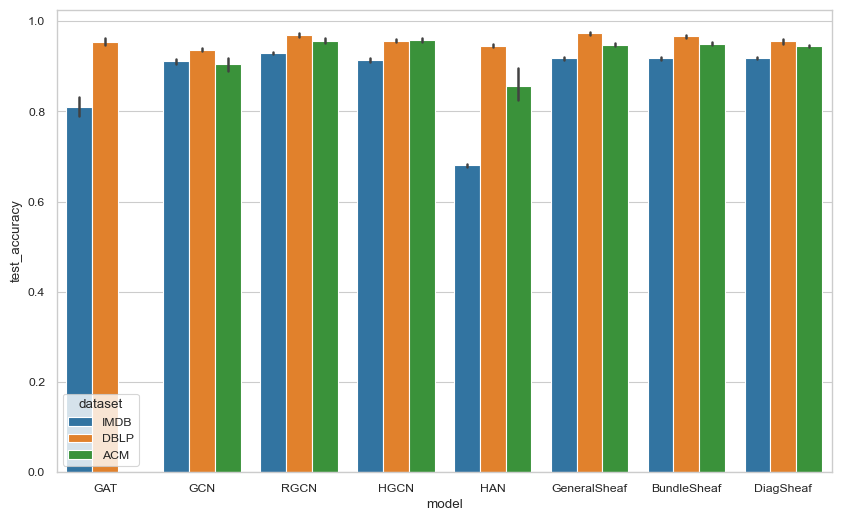

In [7]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)

sns.barplot(df, x="model", y="test_accuracy", hue="dataset", ax=ax)

In [8]:
grouped = df.groupby(["model", "dataset"]).agg(["mean", "std", "max"])
grouped_mean = grouped["test_accuracy"]["mean"].unstack()
grouped_mean.style.highlight_max(color='blue')

dataset,ACM,DBLP,IMDB
model,,,
BundleSheaf,0.950600,0.967200,0.918100
DiagSheaf,0.945400,0.955300,0.919120
GAT,nan,0.955111,0.810340
GCN,0.904600,0.937000,0.912660
GeneralSheaf,0.948500,0.973556,0.917900
HAN,0.856500,0.945800,0.680120
HGCN,0.958500,0.957000,0.914080
RGCN,0.956800,0.969600,0.930500


In [9]:
grouped_max = grouped["test_accuracy"]["max"].unstack()
grouped_max.style.highlight_max(color='blue')

dataset,ACM,DBLP,IMDB
model,,,
BundleSheaf,0.961000,0.975000,0.929400
DiagSheaf,0.951000,0.970000,0.925800
GAT,nan,0.976000,0.871400
GCN,0.930000,0.947000,0.924400
GeneralSheaf,0.955000,0.981000,0.926400
HAN,0.952000,0.955000,0.691000
HGCN,0.969000,0.964000,0.924600
RGCN,0.967000,0.981000,0.936600
